<a href="https://colab.research.google.com/github/VivianKailany/Analise_de_Algoritmo/blob/main/Linha_de_Montagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação de Algoritmos para o Problema das Linhas de Montagem

Neste notebook, vamos comparar dois algoritmos para resolver o problema das Linhas de Montagem usando programação dinâmica. Os algoritmos a serem comparados são:
- **Solução Iterativa**
- **Solução Recursiva com Memoização**

Vamos analisar o tempo de execução de ambos os algoritmos usando dados pequenos e criar gráficos para visualizar o desempenho.


In [1]:
import time
import matplotlib.pyplot as plt
import random


In [2]:

def tempo_minimo_iterativo(tempo, troca, entrada, saida):
    """
    Calcula o tempo mínimo necessário para completar o processo de montagem
    em linhas de montagem usando uma abordagem iterativa de programação dinâmica.

    :param tempo : Lista de listas onde i é o índice da linha (0 ou 1), e j é o índice da
                  estação (0 a N-1, onde N é o número total de estações).
    :param troca: Lista de listas onde i é o índice da linha (0 ou 1), e j é o índice da
                  estação (0 a N-2, onde N é o número total de estações).
    :param entrada: Lista onde entrada[i] representa o tempo de entrada inicial
                    para a linha i.
    :param saida: Lista onde saida[i] representa o tempo de saída final
                  para a linha i.
    :return: O tempo mínimo necessário para completar o processo de montagem.
    """

    n = len(tempo[0])  # Número de estações
    tempoMinimo = [[-1 for _ in range(n)] for _ in range(2)]  # Tabela tempo mínimo acumulado para processar até a estação j na linha i.

    # Inicialização: Tempo necessário para começar e processar na primeira estação
    tempoMinimo[0][0] = entrada[0] + tempo[0][0]  # Linha 0, Estação 0
    tempoMinimo[1][0] = entrada[1] + tempo[1][0]  # Linha 1, Estação 0

    # Iteração sobre estações a partir da estação 1 até a última estação
    for estacao in range(1, n):
        # Calcula o tempo mínimo para chegar à estação atual na Linha 0
        tempoMinimo[0][estacao] = min(
            tempoMinimo[0][estacao - 1] + tempo[0][estacao],  # Permanecer na Linha 0
            tempoMinimo[1][estacao - 1] + troca[1][estacao - 1] + tempo[0][estacao]  # Trocar da Linha 1 para Linha 0
        )

        # Calcula o tempo mínimo para chegar à estação atual na Linha 1
        tempoMinimo[1][estacao] = min(
            tempoMinimo[1][estacao - 1] + tempo[1][estacao],  # Permanecer na Linha 1
            tempoMinimo[0][estacao - 1] + troca[0][estacao - 1] + tempo[1][estacao]  # Trocar da Linha 0 para Linha 1
        )

    # Calcula o tempo total mínimo considerando a saída final de cada linha
    tempo_menor = min(
        tempoMinimo[0][n - 1] + saida[0],  # Tempo final para Linha 0 com a saída final da Linha 0
        tempoMinimo[1][n - 1] + saida[1]   # Tempo final para Linha 1 com a saída final da Linha 1
    )

    return tempo_menor


In [3]:

def tempo_minimo_recursivo_memoizacao(tempo, troca, entrada, saida):
    """
    Calcula o tempo mínimo necessário para completar o processo de montagem
    em linhas de montagem usando uma abordagem recursiva com memoização de programação dinâmica.

    :param tempo : Lista de listas onde i é o índice da linha (0 ou 1), e j é o índice da
                  estação (0 a N-1, onde N é o número total de estações).
    :param troca: Lista de listas onde i é o índice da linha (0 ou 1), e j é o índice da
                  estação (0 a N-2, onde N é o número total de estações).
    :param entrada: Lista onde entrada[i] representa o tempo de entrada inicial
                    para a linha i.
    :param saida: Lista onde saida[i] representa o tempo de saída final
                  para a linha i.
    :return: O tempo mínimo necessário para completar o processo de montagem.
    """

    # Inicializa o cache para memoização
    cache = [[-1 for _ in range(len(tempo[0]))] for _ in range(2)]

    def calcular_tempo(linha, estacao):
        """
        Função auxiliar recursiva para calcular o tempo mínimo usando memoização.

        :param linha: Linha atual (0 ou 1).
        :param estacao: Estação atual (0 até n-1).
        :return: O tempo mínimo necessário para completar o processo a partir da estação atual.
        """
        # Caso base: se estiver na primeira estação, o tempo é o tempo de entrada na linha
        if estacao == 0:
            return entrada[linha] + tempo[linha][0]

        # Verifica se o resultado já foi calculado e retorna se sim
        if cache[linha][estacao] != -1:
            return cache[linha][estacao]

        # Calcula o tempo mínimo para a estação atual usando a abordagem recursiva
        mesma_linha = calcular_tempo(linha, estacao - 1) + tempo[linha][estacao]

        # Calcula o tempo mínimo para a estação atual trocando de linha usando a abordagem recursiva
        troca_linha = calcular_tempo(1 - linha, estacao - 1) + troca[1 - linha][estacao - 1] + tempo[linha][estacao]

        # Armazena o menor tempo entre permanecer na mesma linha e trocar de linha
        cache[linha][estacao] = min(mesma_linha, troca_linha)
        return cache[linha][estacao]

    n = len(tempo[0])
    tempo_menor = min(
        calcular_tempo(0, n - 1) + saida[0],
        calcular_tempo(1, n - 1) + saida[1]
    )

    return tempo_menor


In [4]:

def comparar_algoritmos(m=10):
    """
    Compara os algoritmos iterativo e recursivo com memoização em termos de tempo de execução.

    Parâmetros:
    m (int): Número de entradas de tamanho n a serem geradas para calcular o tempo médio.
    """
    tamanhos = [2, 10, 20, 50, 100, 150, 200, 400]  # Tamanhos das entradas
    tempos_iterativos = []
    tempos_recursivos = []

    for n in tamanhos:
        tempo_iterativo_total = 0
        tempo_recursivo_total = 0

        for _ in range(m):
            # Gerar dados de teste aleatórios
            tempo = [[random.randint(1, 10) for _ in range(n)] for _ in range(2)]
            troca = [[random.randint(1, 5) for _ in range(n - 1)] for _ in range(2)]
            entrada = [random.randint(5, 10) for _ in range(2)]
            saida = [random.randint(5, 10) for _ in range(2)]

            # Medir tempo do algoritmo iterativo
            start = time.time()
            tempo_minimo_iterativo(tempo, troca, entrada, saida)
            end = time.time()
            tempo_iterativo_total += (end - start)

            # Medir tempo do algoritmo recursivo com memoização
            start = time.time()
            tempo_minimo_recursivo_memoizacao(tempo, troca, entrada, saida)
            end = time.time()
            tempo_recursivo_total += (end - start)

        # Calcular a média dos tempos
        tempos_iterativos.append(tempo_iterativo_total / m)
        tempos_recursivos.append(tempo_recursivo_total / m)

    # Plotar os resultados
    plt.figure(figsize=(10, 8))
    plt.plot(tamanhos, tempos_iterativos, label='Iterativo', marker='o')
    plt.plot(tamanhos, tempos_recursivos, label='Recursivo com Memoização', marker='o')
    plt.xlabel('Tamanho da Entrada')
    plt.ylabel('Tempo de Execução Médio (segundos)')
    plt.title('Comparação entre Algoritmos de Programação Dinâmica')
    plt.legend()
    plt.grid(True)
    plt.show()



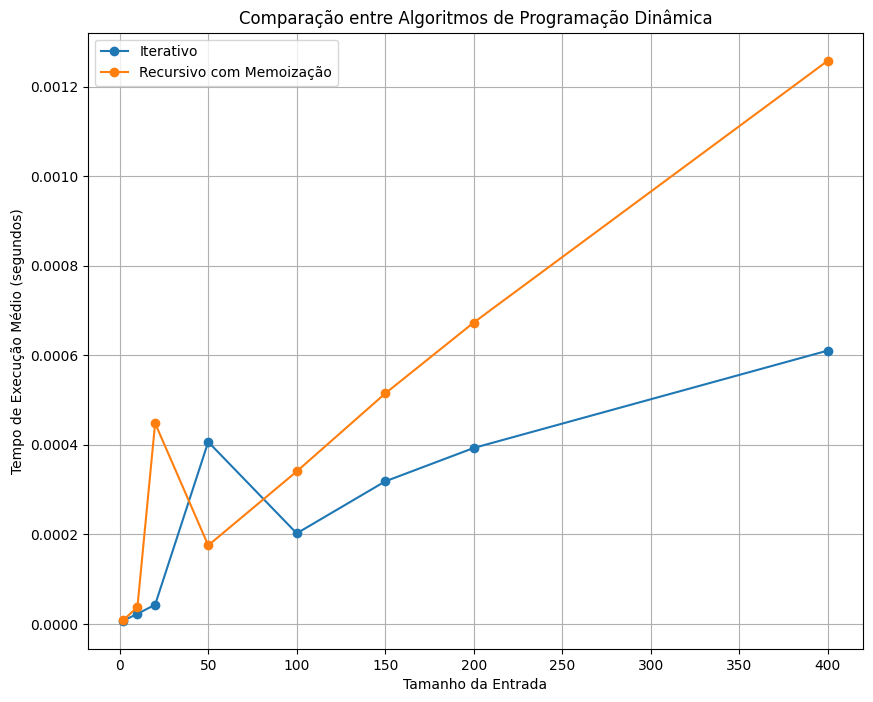

In [5]:
# Executar a comparação
comparar_algoritmos()


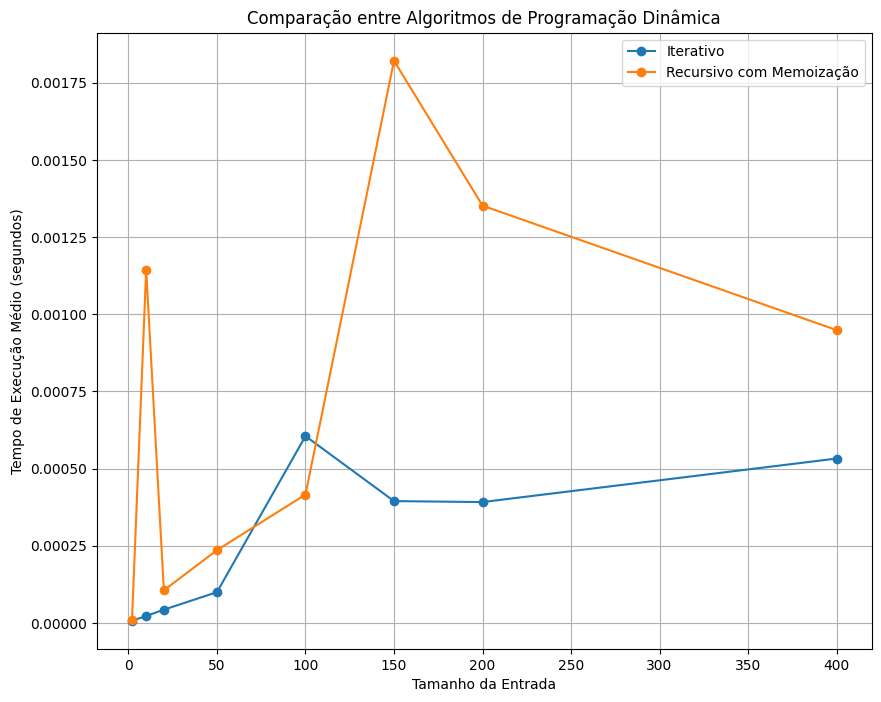

In [6]:
comparar_algoritmos()


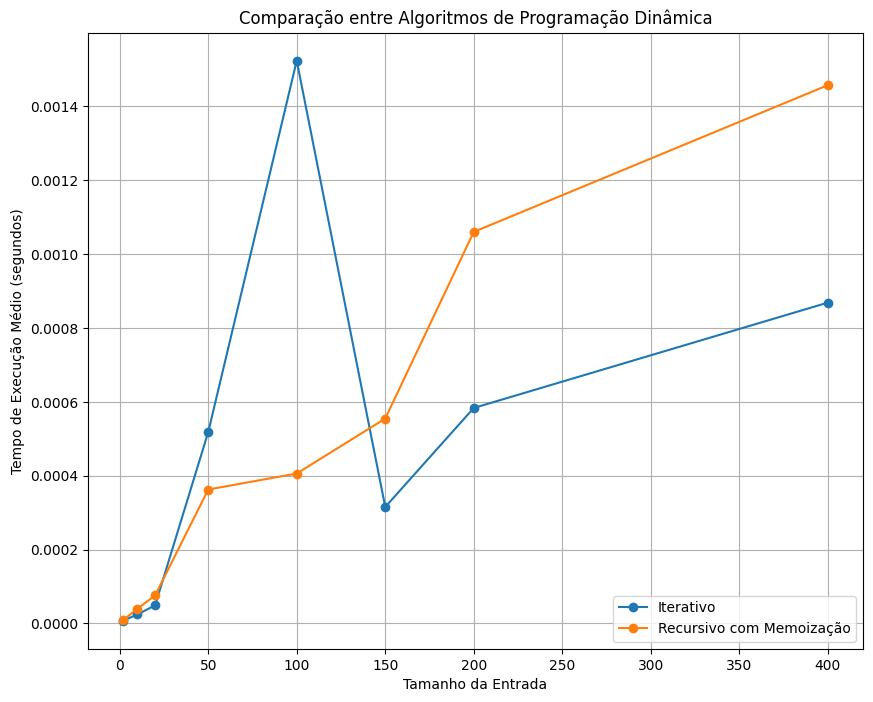

In [7]:
comparar_algoritmos()

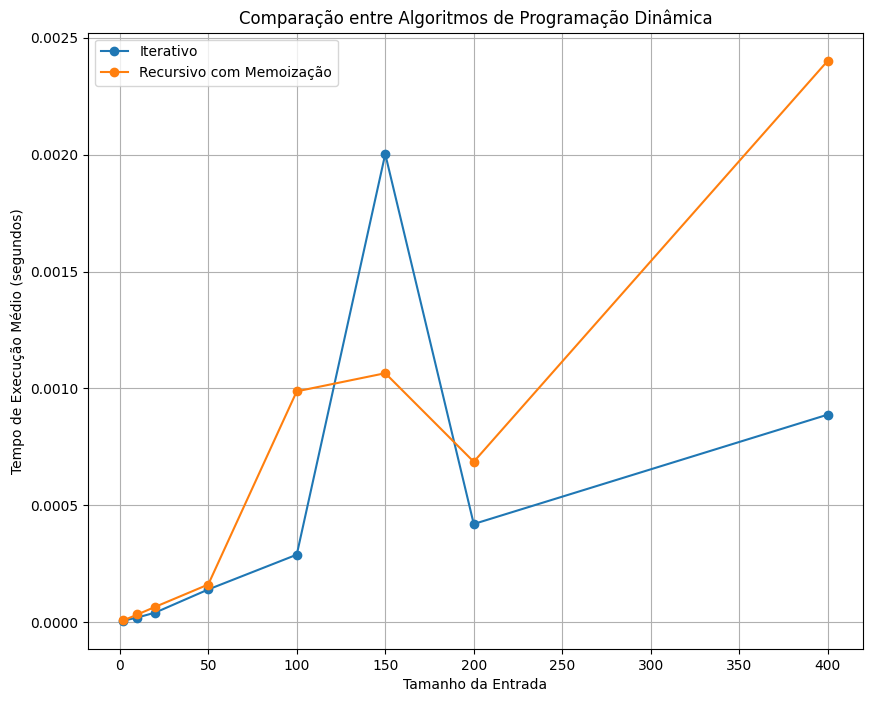

In [8]:
comparar_algoritmos()